# Predicting the Value of a Timber Lot
---

## Abstract
---

A new logging company "Chop Em Down" has contracted out a Data Science Firm to build a pricing model for timber contracts on public lands managed by the Bureau of Land Management (BLM). Every year, the BLM selects plots of land to be auctioned off to logging companies. The size of the plot is determined and the volume of logs contained in the plot is estimated. These measures are provided to logging companies who decide if and how much they want to bid for the right to log it. These are the same measures that are used in building the pricing model. There was a lot of effort put forth in understanding, cleaning, and interpreting the data. There were also a fair amount of outliers and high leverage observations in the data. However, after accounting for them, a fairly accurate linear regression model was produced using training data. The pricing model uses a combination of the estimate of board feet and cubic feet of wood on the plot and the acres on the plot. When run against training data, the model was able to account for 84% of the variability in the value of the plot. The model results using test data yielded results fairly similar to those from the training data. However, the model is most accurrate amongst plots of land less than 490 acres that contain less than either 1,324,776 cubic feet of wood product or less than 7,822,949 board feet of lumber. Therefore, it is only recommended to use this model for plots of land that fit this criteria.

## Data
---

Bureau wide BLM timber sale data was obtained from __[blm.gov](https://www.blm.gov/programs/natural-resources/forests-and-woodlands/timber-sales/bureau-wide-timber-data)__. The data is made up of 31 quarterly excel files each containing information on all active timber contracts from 2012 through 2020 as well as the winning bid price at auction. I combined the 31 excel files into one csv file. Since each timber contract is active for multiple quarters, each contract is displayed multiple times with values changing in response to progress in the logging operation. Therefore, the data needed to be thoroughly cleaned to only show one observation per contract before performing analysis. After cleaning, the data has 1,116 observations and each observation has 6 raw features of initial interest. The plots of land involved are located in either Alaska, Oregon, California, Montana, Idaho, Wyoming, or Colorado and vary greatly in size and value.<br>

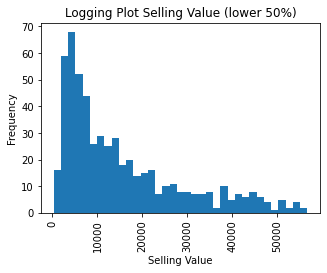

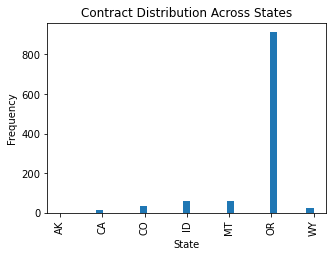

<b>Figure 1: </b>The selling value has a very long tail. The top 50% of the selling value distribution extends evenly to ~3M, then staggers further out to ~6<b>.</b>3M. The top 50% was left out of this plot in order to show the distribution of the lower 50% better (top). The vast majority of logging contracts were written in Oregon (bottom). 

## Variables of Interest
---

### Continuous Variables <br>
<b>Value Sold: </b> The price the winning bidder for the plot of land paid. I have standardized this variable. This is the <b>target variable.</b> See the top item in Figure 1 above. <br>
<b>Mbf Current: </b> The estimate for thousands of board feet of lumber that will be produced from the plot. I have standardized this variable:<br>
<b>Ccf Current: </b> The estimate for hundreds of cubic feet of wood on the plot. I have standardized this variable. <br>
<b>Acres Current: </b> The acreage of the plot. I have standardized this variable. <br>
<b>Contract Term: </b> The number of months the contract is open for. This is the ammount of time a logging company has to extract everything: <br>

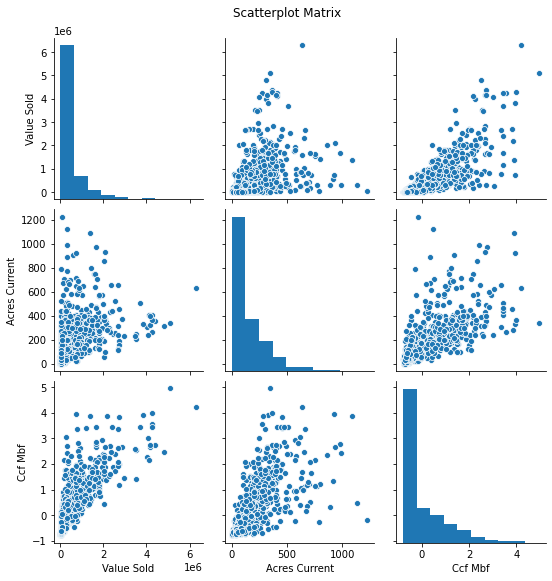

<b>Figure 2: </b>The scatterplot matrix shows that both "Ccf Mbf" (see below under Engineered Variables) and "Acres Current" are positively correlated with the "Value Sold". It also shows that "Ccf Mbf" and "Acres Current" are correlated to each other. The values used in this scatterplot matrix are non-standardized in order to show the true scale.

### Engineered Variables

<b>Ccf Mbf: </b> Due to the high correlation between Mbf and Ccf as shown in Figure 2, I created a variable <b>Ccf Mbf</b> which is a measure of wood volume and is the average of the standardized Mbf Current variable and the standardized Ccf Current variable.

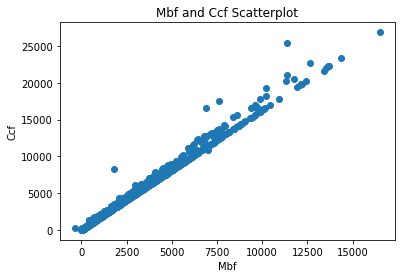

<b>Figure 3: </b>This scatterplot shows that Mbf and Ccf are extremely similar. They have a correlation of 0.996. This makes sense because they are both estimates of wood volume.

### Qualitative Variables

<b>State Office Code: </b>This is simply the state the plot belongs to. It has 7 unique values and has been encoded into 6 binary dummy variables. See Figure 4 below.

### Interaction Terms Considered

<b>(State Office Code) X (Ccf Mbf): </b>Tree biodiversity varies from state to state, and some trees are more valuable than others. Therefore, a particular volume of wood in one state may be more or less valuable than the same unit of volume in another state. Figure 4 shows evidence for this interaction. <br>
<b>(Acres Current) X (Ccf Mbf): </b>This interaction was considered because volume (ccf mbf) and area (acres current) in this context may imply the type of forest on the plot, impacting the value. For example, a new growth plot of lodge pole pine (tall and skinny) will have a lower "ccf mbf" in a given acreage than a plot of old growth douglas fir (fat and tall) would on the same acreage. The douglas fir would also likely have a much greater value (although I hope not too many old growth forests are being logged!!).

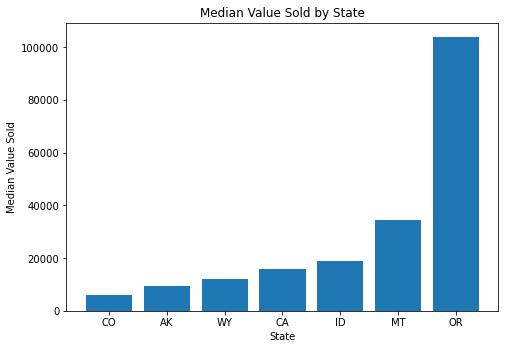

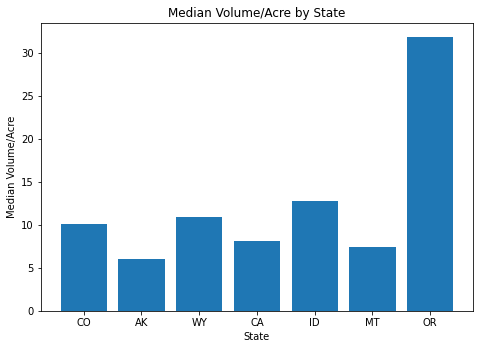

<b>Figure 4: </b>Looking at "Median Value Sold by State", it appears that some states are associated with higher value. However, when looking at "Median Volume/Acre by State", we see this may only be the case with OR. The reason states such as CO or AK have such low values is because the size of the plots. These plots show that whether or not a plot is in Oregon significantly impacts the value of it.

## Model Results
---

I used a randomly selected set of training data to run different linear regression models. The training set consisted of 892 observations, which is 80% of the full data set, leaving 224 observations for testing. After much trial and error, the most accurate model I was able to build uses "Ccf Mbf", "Acres Volume" (interaction term between Acres and Ccf Mbf) and "Acres Current Standardized". All three predictor variables show significance in terms of their p-value and the model has an R-squared of 70.7%. Details can be found below in Figure 5.

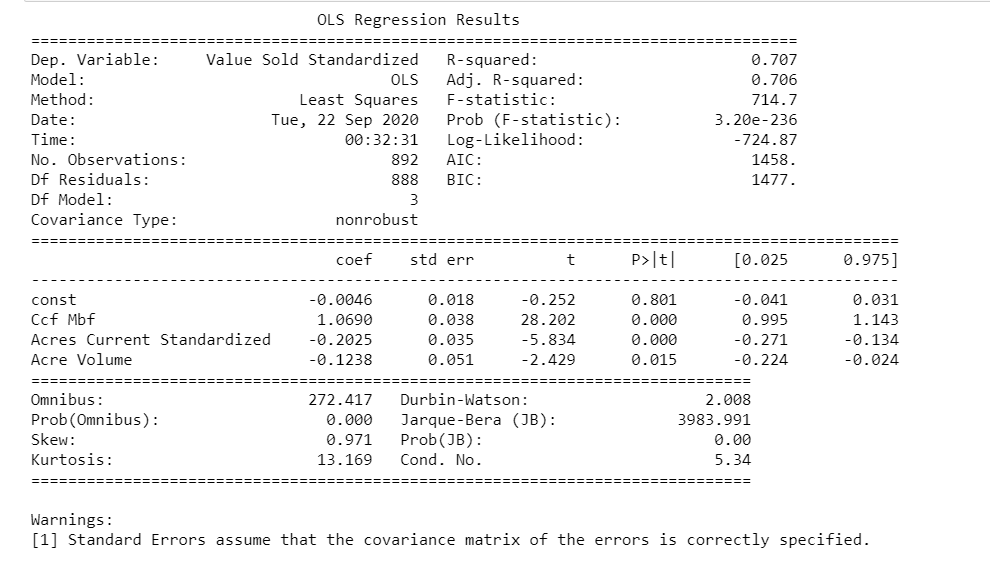

<b>Figure 5: </b>The table shows the summary of the initial regression model.

The next line of business was reviewing the residual plot in order to spot any potential problems. The residual plot showed no "tracing", but there is an obvious "fanning" pattern in the residual plot which shows uneven variance in the model. Therefore, I applied a square root transformation on the target variable and ran the regression model again. All three predictor variables remained significant and the R-squared value increased to 81.6% and the F-statistic increased to 1,313, corresponding to a p-value < 0.001, signifying a statistically significant model. In addition, the residuals evened out significantly. The two sets of residuals can be seen below in Figure 6.

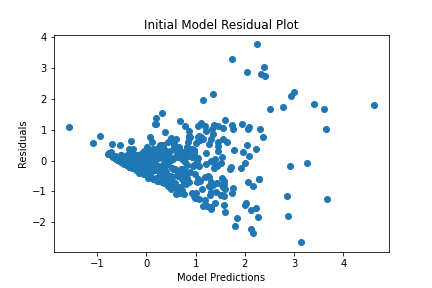

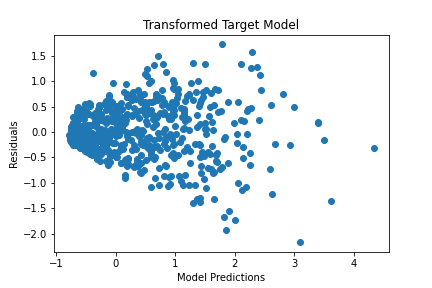

<b>Figure 6: </b>The residual plot for the initial model shows uneven variance in the model (top). After transforming the target variable by taking the square root, the residuals are showing much more even variance (bottom).

Next, I checked for outliers and high leverage observations. Based on the partial regression plots and inflence plot (Figure 7), I was able to see that some points were creating unwanted leverage. Mainly, I saw leverage in the Acre Volume partial regression. I would expect the slope of the Acre Volume partial regression to be more negative. When looking at the influence plot (based on cooks distance leverage terms) and the associated cooks distance values (not shown here), it appears as though the observations where the absolute value of the cooks distance is greater than 0.025 are providing the highest leverage. Because of their leverage, and not having many neighbors, I decided to exclude these high leverage points from the training data set.

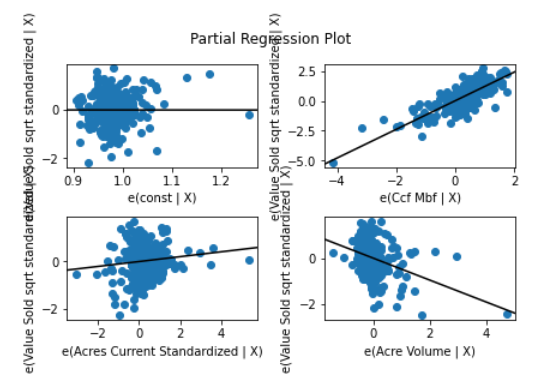

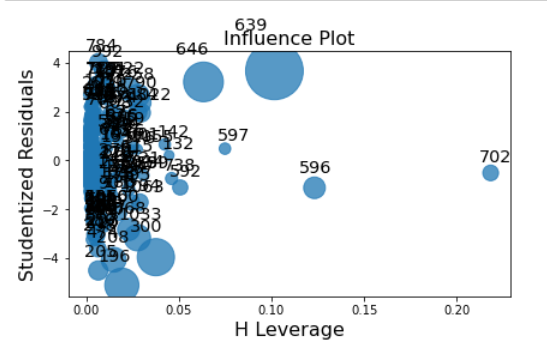

<b>Figure 7: </b>The partial regression plots (top) show that there is some sort of leveraging acting on the partial regression of the interaction variable "Acre Volume". When looking at the influence plot, we can see some of the likely culprits (bottom).

After the removal of these high leverage observations, the accuracy of the model increased as seen in the R-squared which increased from 81.6% to 84.1%. Also, the partial regression plot looks a lot nicer after the removal of these high leverage observations. The partial regressions seem to follow the implied relationships much better. The final model can be seen below in Figure 8.

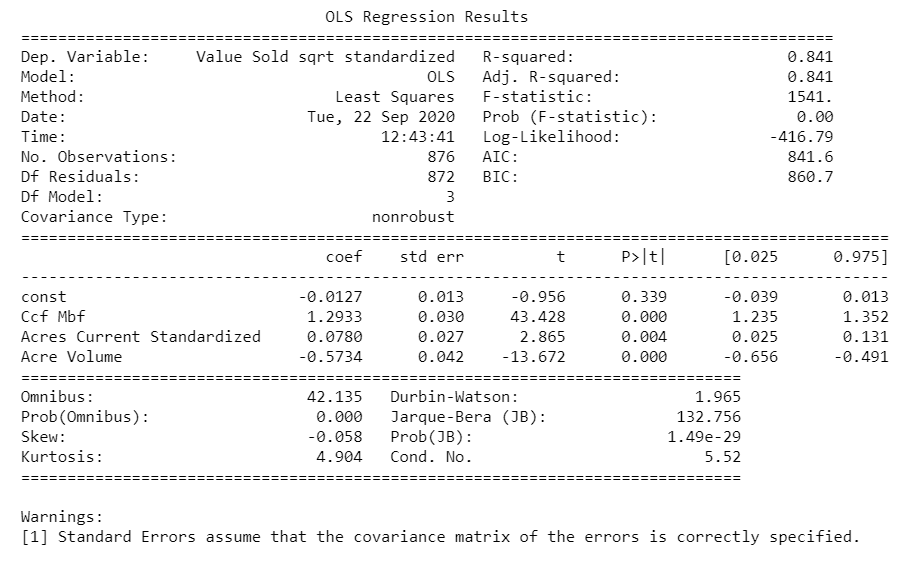

<b>Figure 8: </b>The above table shows the summary of the final model selected. 84.1% of the variability in the "Value Sold" is explained by this model. This model implies that an increase in one unit of wood volume (ccf mbf) increases the 'standardized square root of the "Value Sold"' (target value) by 43.4 dollars. An increase in one unit of standardized Acreage increases the target value by 2.86 dollars. Lastly, given a specific unit of wood volume, an increase in one unit of standardized acreage decreases the target value by 13.67 dollars.

## Conclusion
---

In conclusion, this model accounts for 84.1% of the variability that would be found if we used only the mean of the target variable as a predictor. I would like to see over 90% of the variability  accounted for, but given the data used, I think 84.1% is good. The main driver for price is the volume of wood estimated to be contained on the plot. We can see this in the coefficient in Figure 8 above. This shows that an increase in one unit (one standard deviation in the context of this standardized variable) of "Ccf Mbf" is associated with an increse of 1.29 standard deviations of the value's square root. Likewise, an increase in one standard deviation of acreage is associated with an increase of 0.078 standard deviations of the value's squre root. Lastly, setting the "Ccf Mbf" constant and increasing the acreage by 1 standard deviation is associated with a decrease of 0.57 standard deviations of the value's square root. Due to the standardizations and transformations of variables, the interpretation of this model are a little bit tricky, but are still strong.

## Model Limitation
---

<b>Limitations: </b>Because of the lack of timber contracts with higher acreage, the model is best at predicting the value of a plot with smaller acreage and a smaller amount of wood volume. In particular, I am advising that this model only be used for predicting timber contract value for plots that are less than 490 acres and have a wood volume of less than either 1,324,776 cubic feet (ccf*100) or 7,822,949 board feet (mbf * 1,000). 

## Future Additions
---

<b>Future Additions: </b><br>1. In the future I would like to predict the "total value cut" on a plot rather than what the plot will bid at. <br>
2. Since tree species information isn't provided by the BLM, performing image analysis on historic satellite imagery for logging plots may provide an estimate of its tree species. <br>
3. Operating costs are high in the logging industry. Transportation of logs from the site to the sawmill is expensive and is based on the plots proximity to an industrial sawmill. Another factor is the topography of the land. Steeper plots of land are more difficult and dangerous to work on. The addition of estimated operating costs could add value to the model.